<a href="https://colab.research.google.com/github/kuberseth002/Data_Science_Practice/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Healthcare Data Ingestion").getOrCreate()


In [11]:
from google.colab import files

uploaded = files.upload()


Saving healthcare_dataset.csv to healthcare_dataset.csv


In [12]:
import os
os.listdir()


['.config',
 'healthcare_dataset[2].csv',
 'healthcare_dataset.csv',
 'sample_data']

In [14]:
df = spark.read.csv("healthcare_dataset.csv", header=True, inferSchema=True)


In [15]:
df.printSchema()


root
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Blood Type: string (nullable = true)
 |-- Medical Condition: string (nullable = true)
 |-- Date of Admission: date (nullable = true)
 |-- Doctor: string (nullable = true)
 |-- Hospital: string (nullable = true)
 |-- Insurance Provider: string (nullable = true)
 |-- Billing Amount: double (nullable = true)
 |-- Room Number: integer (nullable = true)
 |-- Admission Type: string (nullable = true)
 |-- Discharge Date: date (nullable = true)
 |-- Medication: string (nullable = true)
 |-- Test Results: string (nullable = true)



In [18]:

df.show(5)

df_transformed = df.selectExpr("Age as Patient_Age", "Gender", "`Medical Condition` as Disease")

df_filtered = df_transformed.filter("Patient_Age > 40")

df_filtered.show(10)


+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|         Name|Age|Gender|Blood Type|Medical Condition|Date of Admission|          Doctor|            Hospital|Insurance Provider|    Billing Amount|Room Number|Admission Type|Discharge Date| Medication|Test Results|
+-------------+---+------+----------+-----------------+-----------------+----------------+--------------------+------------------+------------------+-----------+--------------+--------------+-----------+------------+
|Bobby JacksOn| 30|  Male|        B-|           Cancer|       2024-01-31|   Matthew Smith|     Sons and Miller|        Blue Cross|18856.281305978155|        328|        Urgent|    2024-02-02|Paracetamol|      Normal|
| LesLie TErRy| 62|  Male|        A+|          Obesity|       2019-08-20| Samantha Davies|             Kim Inc|          Medicare|33

In [19]:
pdf = df_transformed.toPandas()


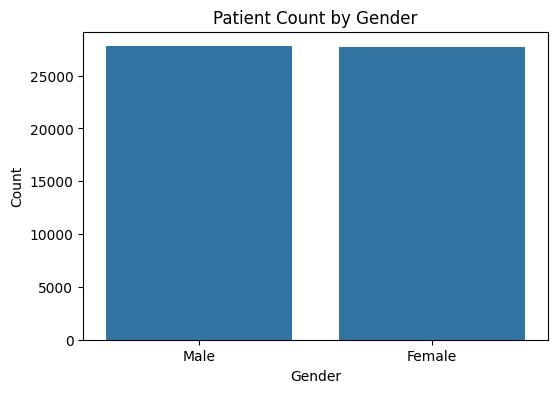

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=pdf, x='Gender')
plt.title("Patient Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


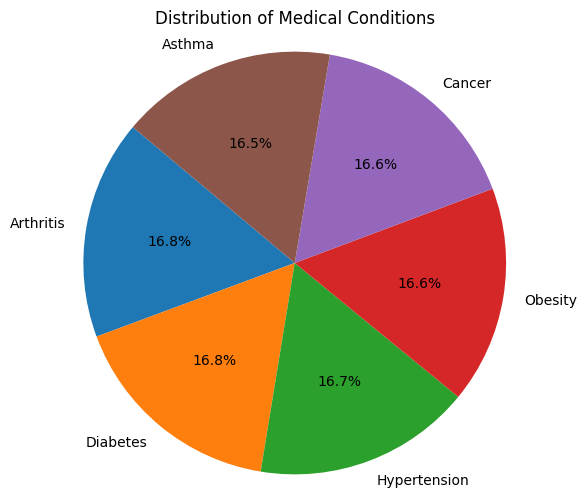

In [21]:
disease_counts = pdf['Disease'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Medical Conditions")
plt.axis('equal')
plt.show()
